In [1]:
import torch
from multi_scale_attention import MultiScaleAttention
import matplotlib.pyplot as plt

c:\Users\abjawad\.conda\envs\pt_cuda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_batch_images(batch_index, f, y):
    # Extract the tensors for the given batch index
    f_batch = f[batch_index]
    y_batch = y[batch_index]

    # Reshape and calculate mean for f
    arr_f = f_batch.permute(1, 0)
    arr_f = torch.mean(arr_f, dim=0)
    arr_f = arr_f.reshape(120, 160)

    # Reshape and calculate mean for y
    arr_y = y_batch.permute(1, 0)
    arr_y = torch.mean(arr_y, dim=0)
    arr_y = arr_y.reshape(120, 160)

    # Create a row of two subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot f
    axes[0].imshow(arr_f.detach().numpy(), cmap='viridis')
    axes[0].set_title('f (Batch {})'.format(batch_index))
    axes[0].axis('off')

    # Plot y
    axes[1].imshow(arr_y.detach().numpy(), cmap='viridis')
    axes[1].set_title('y (Batch {})'.format(batch_index))
    axes[1].axis('off')

    plt.show()

input to multiScaleAttention:torch.Size([4, 19200, 32])
output:  torch.Size([4, 19200, 32])


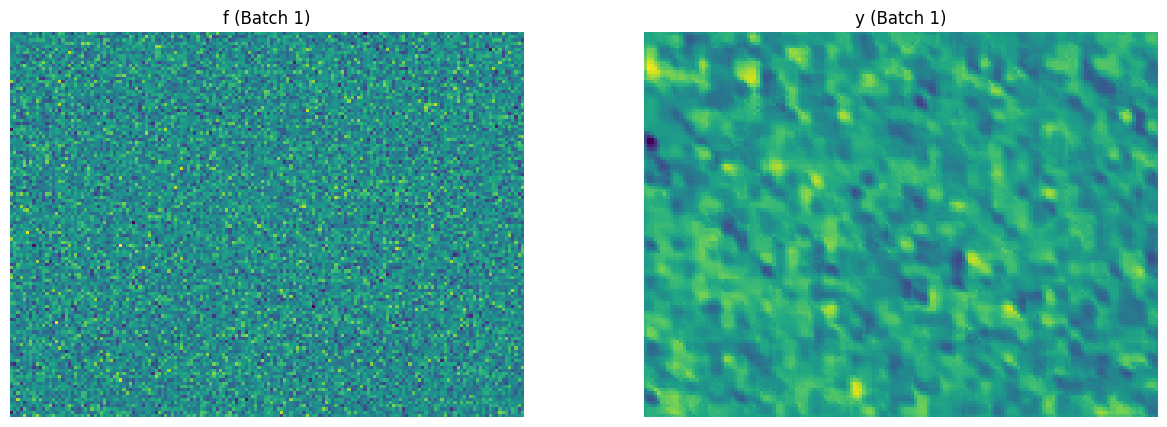

In [3]:
B = 4
C = 3
H = 480
W = 640
device = 'cpu'
ms_attention = MultiScaleAttention(32, num_heads=4, sr_ratio=8, local_region_shape=[2,4])
ms_attention = ms_attention.to(device)
# ms_attention = nn.DataParallel(ms_attention, device_ids = [0,1])
# ms_attention.to(f'cuda:{ms_attention.device_ids[0]}', non_blocking=True)

f = torch.randn(B, 19200, 32).to(device)
print(f'input to multiScaleAttention:{f.shape}')
y = ms_attention(f, 120, 160)
print('output: ',y.shape)

plot_batch_images(1, f, y)

In [5]:
def plot_images_in_row(x_s, x_l, y):
    # Take the mean across channels for each image
    x_s_mean = torch.mean(x_s, dim=1, keepdim=True)
    x_l_mean = torch.mean(x_l, dim=1, keepdim=True)
    y_mean = torch.mean(y, dim=1, keepdim=True)

    y_mean = y_mean.squeeze().cpu().detach().numpy()

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create a row of three subplots

    # Plot x_s
    axes[0].imshow(x_s_mean.squeeze().cpu().numpy(), cmap='viridis')
    axes[0].set_title('Mean of x_s')
    axes[0].axis('off')

    # Plot x_l
    axes[1].imshow(x_l_mean.squeeze().cpu().numpy(), cmap='viridis')
    axes[1].set_title('Mean of x_l')
    axes[1].axis('off')

    # Plot y
    axes[2].imshow(y_mean, cmap='viridis')
    axes[2].set_title('Mean of y')
    axes[2].axis('off')

    plt.show()

input to stokenAttention: x_s:torch.Size([1, 32, 120, 160]), x_l:torch.Size([1, 32, 120, 160])
output:  torch.Size([1, 32, 120, 160])


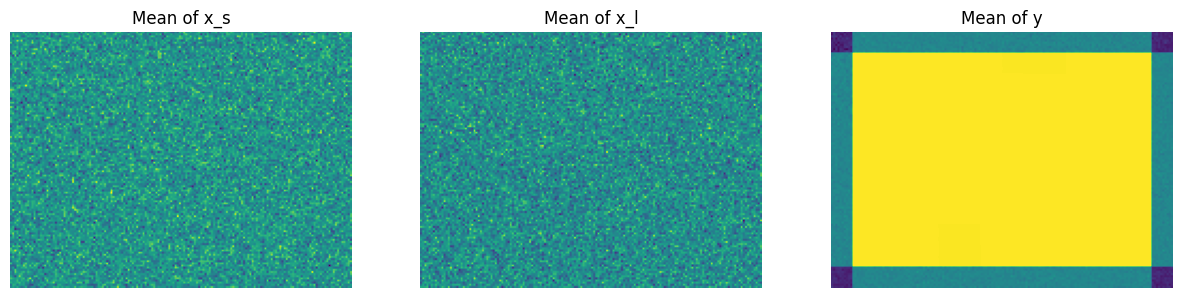

In [6]:
from stoken_attn_fusion import StokenAttention

def take_mean_of_channels(x):
    return torch.mean(x, dim=1, keepdim=True)


B = 1
C = 32
H = 120
W = 160
x_s = torch.randn(B, C, H, W)
x_l = torch.randn(B, C, H, W)

# x_s = torch.full((B, C, H, W), 1.0)
# x_l = torch.full((B, C, H, W), 0.1)

attn_fusion = StokenAttention(dim=32, sp_stoken_size=(5,5), lp_stoken_size=(10,10))
print(f'input to stokenAttention: x_s:{x_s.shape}, x_l:{x_l.shape}')
y = attn_fusion(x_s, x_l)
print('output: ',y.shape)

plot_images_in_row(x_s, x_l, y)